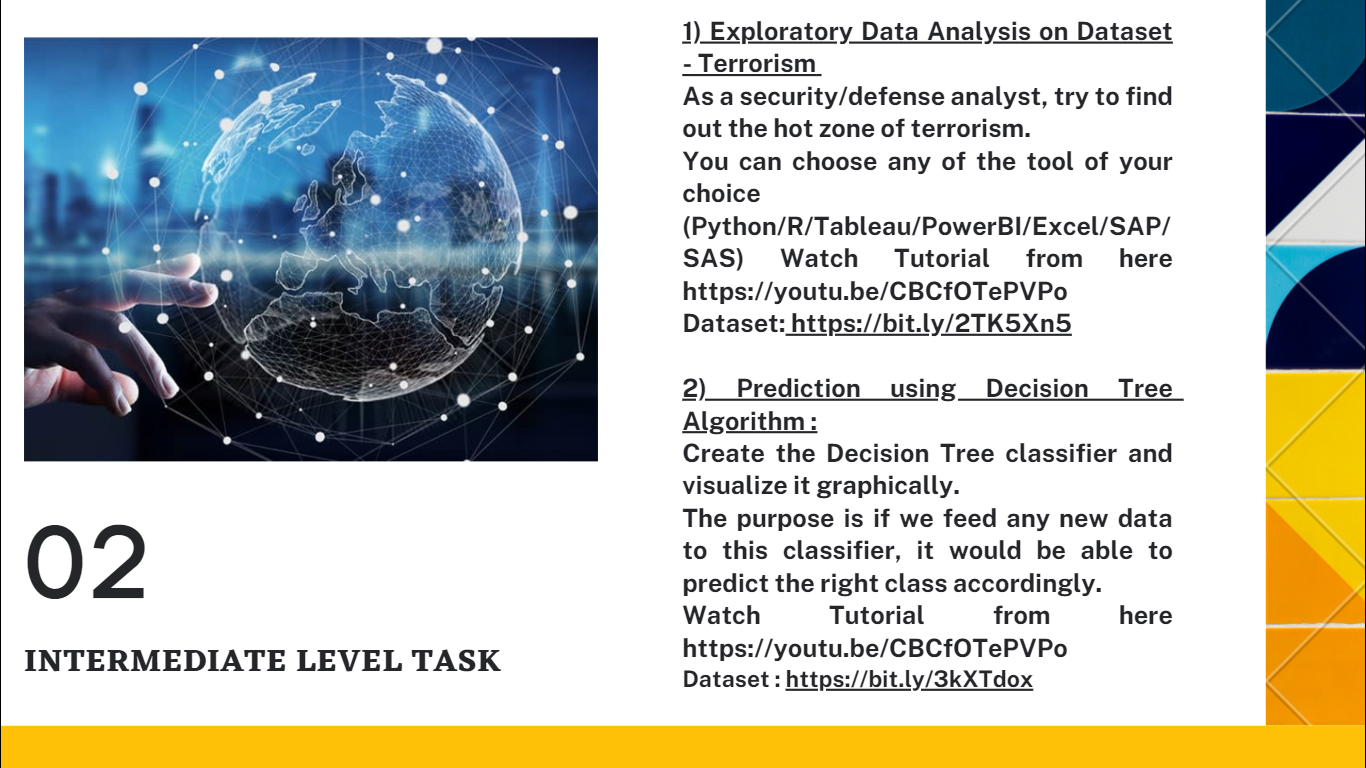

# Exploratory Data Analysis on dataset - Terrorism

## import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## read csv file

In [2]:
df = pd.read_csv('C:/Users/tusha/Downloads/Global Terrorism/globalterrorismdb_0718dist.csv')

## top n rows of dataset ( n = 5 by default)

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## column names

In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## renaming the columns

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
df = df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## shape

In [8]:
df.shape

(181691, 18)

## checking for null values

In [9]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

## summary of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

## Number of terrorist attacks each year

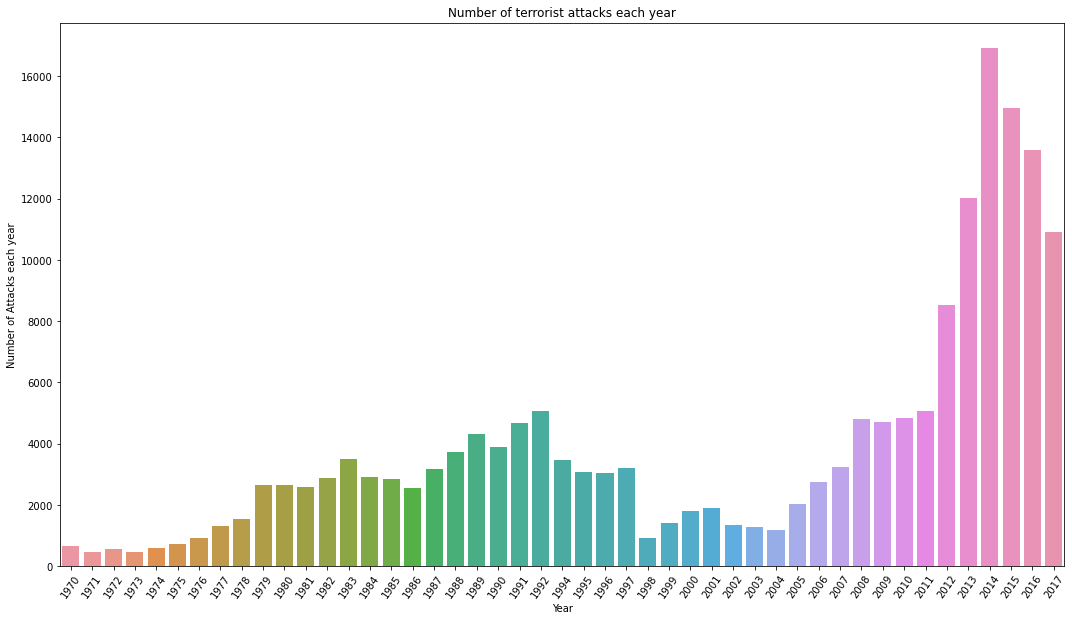

In [11]:
yr = df['Year'].unique()
yr_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = yr,
           y = yr_count)
plt.xticks(rotation = 55)
plt.xlabel('Year')
plt.ylabel('Number of Attacks each year')
plt.title('Number of terrorist attacks each year')
plt.show()

## Terrorist Activities by Region in each Year 

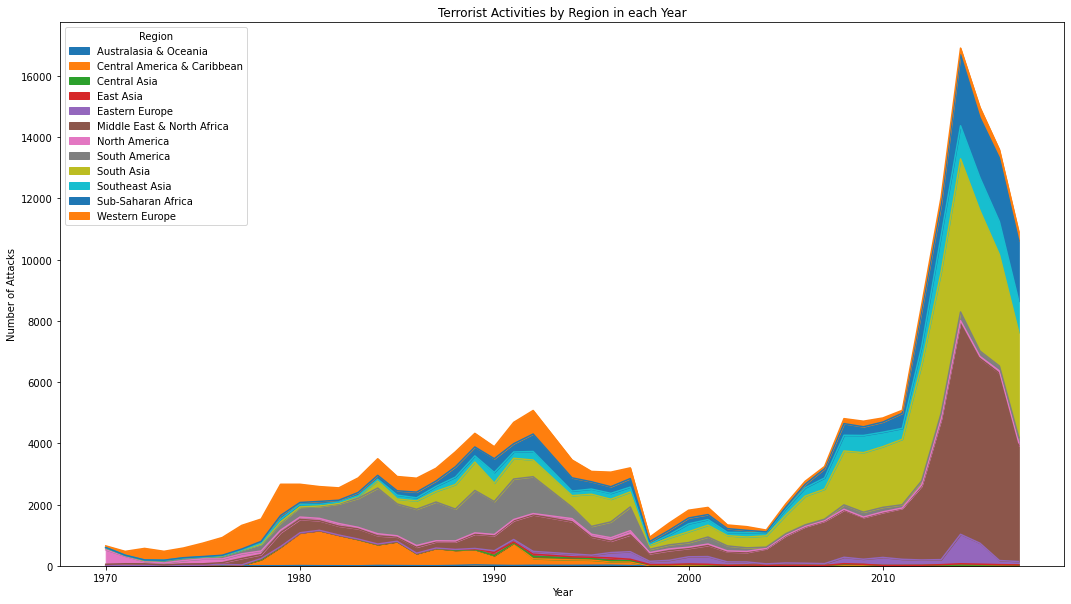

In [12]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(18,10))
plt.title('Terrorist Activities by Region in each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

In [13]:
attack = df.Country.value_counts()

In [14]:
attack

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Vatican City               1
New Hebrides               1
Antigua and Barbuda        1
South Vietnam              1
Falkland Islands           1
Name: Country, Length: 205, dtype: int64

## affected countries 

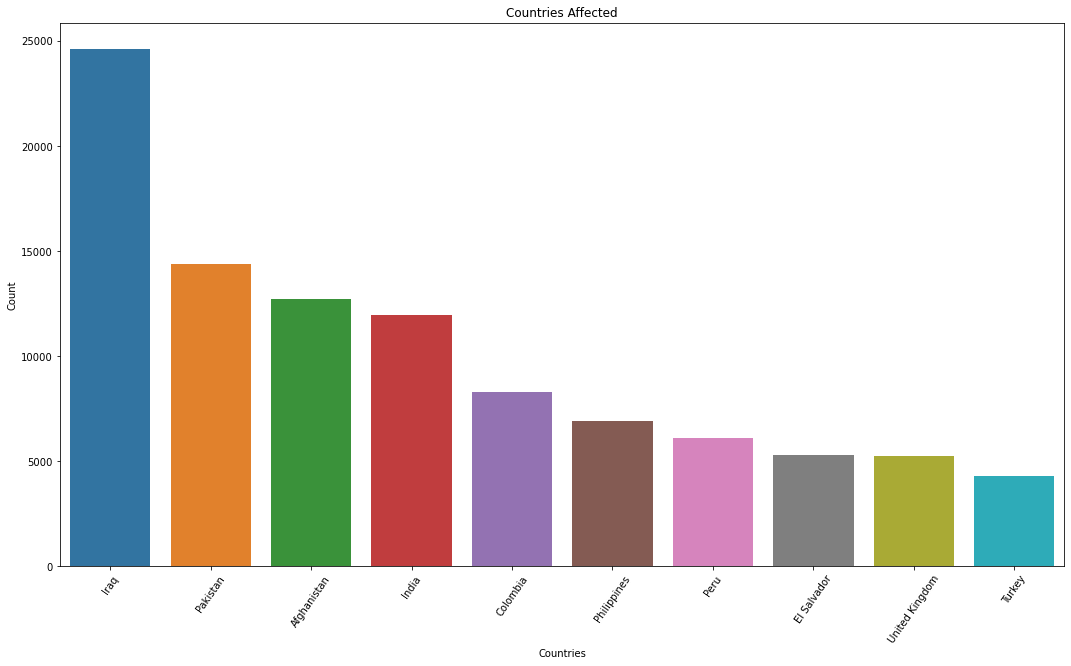

In [15]:
plt.subplots(figsize=(18,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 55)
plt.show()

## Number of people died 

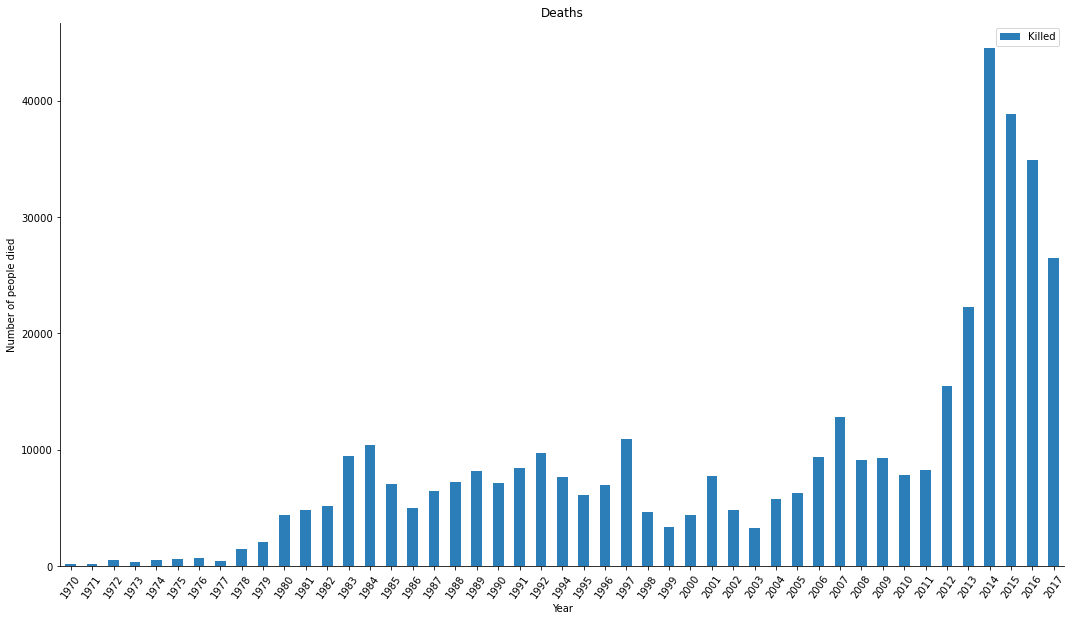

In [16]:
df1 = df[['Year', 'Killed']].groupby(['Year']).sum()
fig,ax4 = plt.subplots(figsize = (18,10))
df1.plot(kind = 'bar', alpha = 0.95, ax = ax4)
plt.title('Deaths')
plt.xlabel('Year')
plt.ylabel('Number of people died')
plt.xticks(rotation= 55)
top_side = ax4.spines['top']
top_side.set_visible(False)
right_side = ax4.spines['right']
right_side.set_visible(False)


## most affected cities

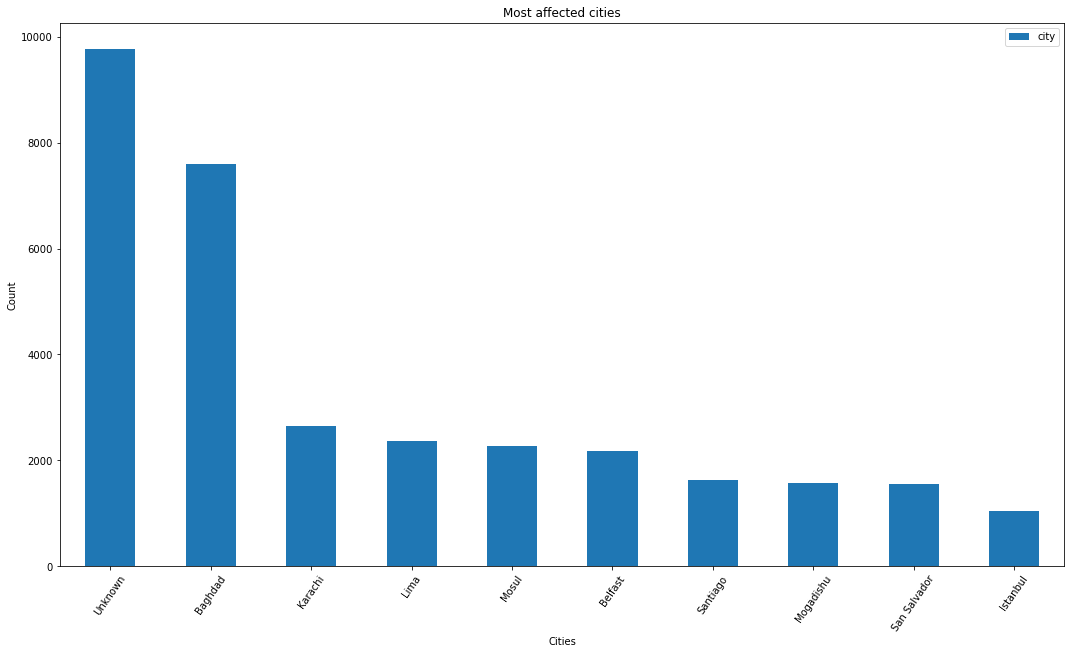

In [17]:
df['city'].value_counts().to_frame().sort_values('city', axis = 0, ascending = False).head(10).plot(kind ='bar', figsize = (18,10))
plt.title('Most affected cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 55)
plt.show()

In [18]:
df.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

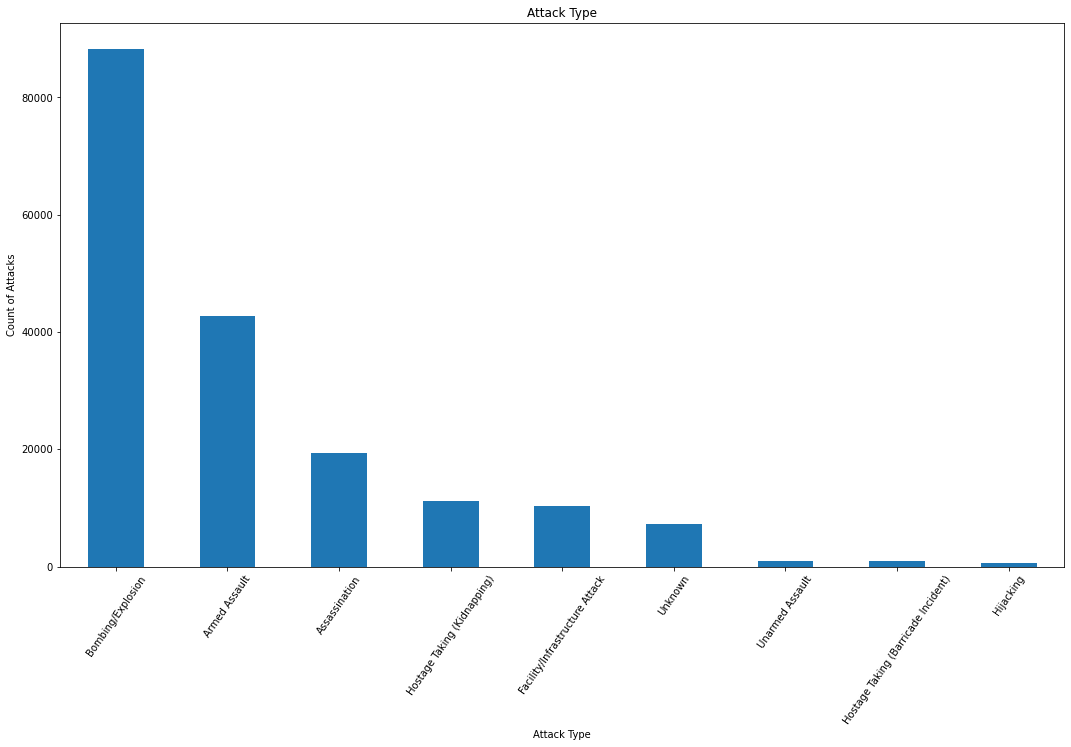

In [19]:
df['AttackType'].value_counts().plot(kind ='bar', figsize = (18,10))
plt.title('Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count of Attacks')
plt.xticks(rotation= 55)
plt.show()

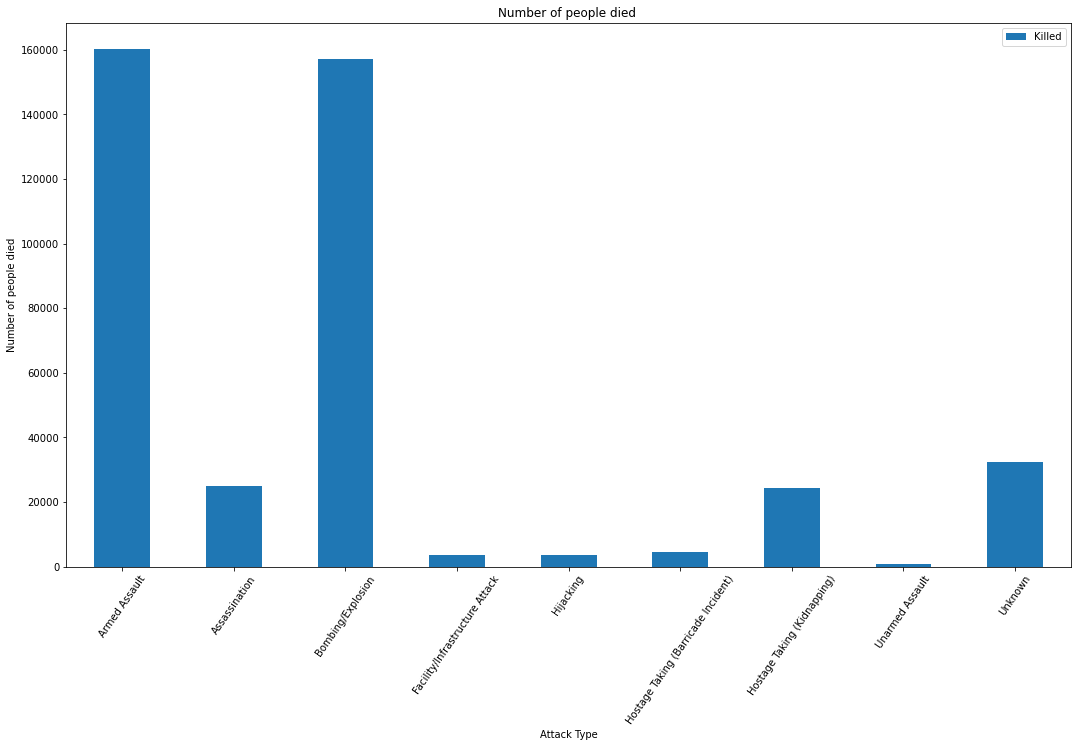

In [20]:
df[['AttackType', 'Killed']].groupby(["AttackType"], axis = 0).sum().plot(kind = 'bar', figsize = (18,10))
plt.title('Number of people died ')
plt.xlabel('Attack Type')
plt.ylabel('Number of people died')
plt.xticks(rotation= 55)
plt.show()

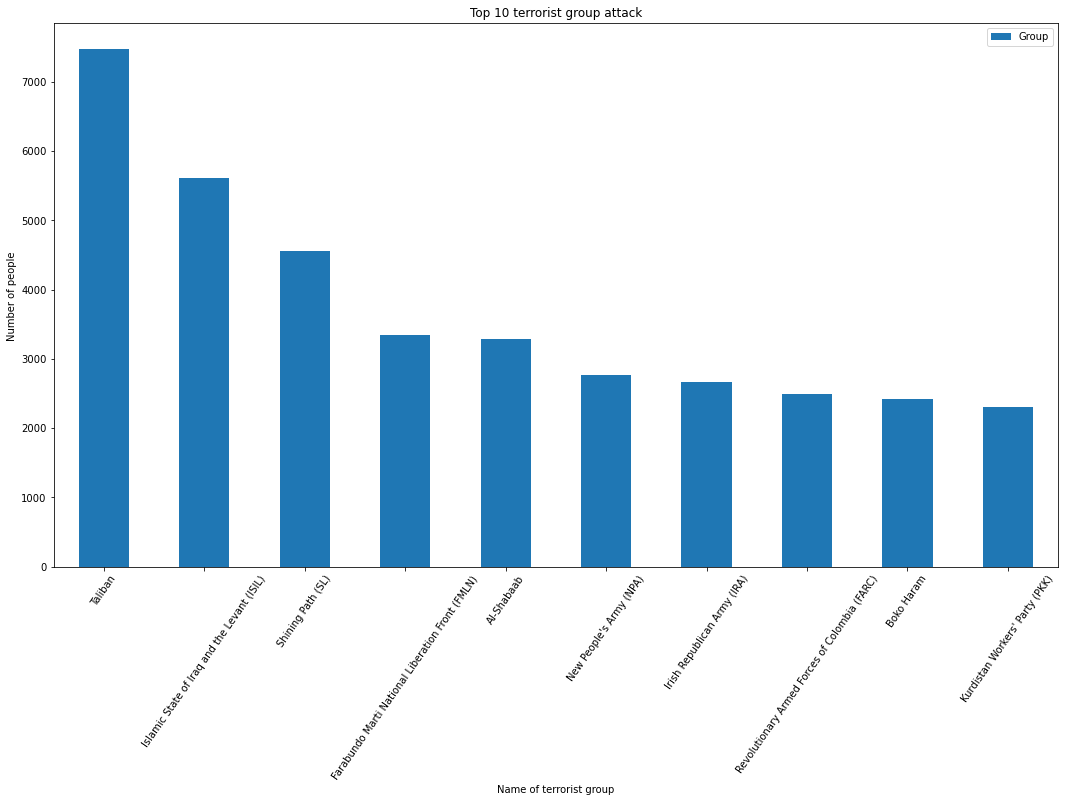

In [21]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind ='bar', figsize = (18,10))
plt.title('Top 10 terrorist group attack')
plt.xlabel('Name of terrorist group')
plt.ylabel('Number of people ')
plt.xticks(rotation= 55)
plt.show()

In [22]:
df1 = df[['Group', 'Country', 'Killed']]
df1 = df1.groupby(['Group', 'Country'], axis = 0).sum().sort_values('Killed',ascending = False).drop('Unknown').reset_index().head(10)
df1

,Group,Country,Killed
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


# Conclusion
## Year with the most attacks: 2014
## Region with the most attacks: Middle East & North Africa
## Country with the most attacks: Iraq  
## City with the most attacks: Baghdad
## Most Attack Types: Bombing/Explosion    
## Group with the most attacks: Taliban